# **1. Importing file and Reading data form clustering_data.csv**

***Installing neccesary libraries***

In [1]:
!pip install gdown

***Importing all the necessary libraries***

In [2]:
import gdown
import pandas as pd
import io
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import ipywidgets as widgets

***Downloading neccesary datasets***

In [3]:
file_id = '1TcJKQXWW6Xk-P2qo3s_30Ev6-XzFRr7z'
output = 'clustering_data.csv'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1TcJKQXWW6Xk-P2qo3s_30Ev6-XzFRr7z
To: /content/clustering_data.csv
100%|██████████| 19.9M/19.9M [00:00<00:00, 124MB/s] 


'clustering_data.csv'

***Reading the csv file and making a data frame out of it using pandas***

In [4]:
df = pd.read_csv('clustering_data.csv')



# **2. Data Preprocessing**

# **2-A. Cleaning-up NULL values**

***Checking where and how many NULL values are present in dataframe***

In [5]:
df.isnull().sum()

CircleName         0
RegionName        53
DivisionName       2
OfficeName         0
Pincode            0
OfficeType         0
Delivery           0
District           0
StateName          0
Latitude        8838
Longitude       8843
dtype: int64

***Removing rows where NULL values are present***

In [6]:
df.dropna(subset=['Latitude', 'Longitude', 'RegionName', 'DivisionName'], inplace=True)
df.isnull().sum()

CircleName      0
RegionName      0
DivisionName    0
OfficeName      0
Pincode         0
OfficeType      0
Delivery        0
District        0
StateName       0
Latitude        0
Longitude       0
dtype: int64

# **2-B.Extracting the entries corresponding to home state**

In [7]:
df_home_state = df[(df['StateName'] == 'GUJARAT')]
df_home_state.head()

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
1350,Gujarat Circle,Ahmedabad HQ Region,Sabarkantha Division,ZAHIRABAD B.O,383002,BO,Delivery,SABAR KANTHA,GUJARAT,23.6093,72.949
1351,Gujarat Circle,Ahmedabad HQ Region,Sabarkantha Division,KUKDI B.O,383422,BO,Delivery,SABAR KANTHA,GUJARAT,24.336149,73.125996
1353,Gujarat Circle,Ahmedabad HQ Region,Ahmedabad City Division,Kathwada GIDC S.O,382430,PO,Non Delivery,AHMADABAD,GUJARAT,23.0279349,72.6817017
1364,Gujarat Circle,Ahmedabad HQ Region,Mahesana Division,Anand Bhankhri B.O,384330,BO,Delivery,MAHESANA,GUJARAT,23.979529,72.713685
3091,Gujarat Circle,Ahmedabad HQ Region,Mahesana Division,Rangpurda B.O,384440,BO,Delivery,MAHESANA,GUJARAT,23.258217,72.339232


***Plotting all the points on a scatter plot of Latitude vs Longitude for Home State and importing warnings to ignore warnings.***

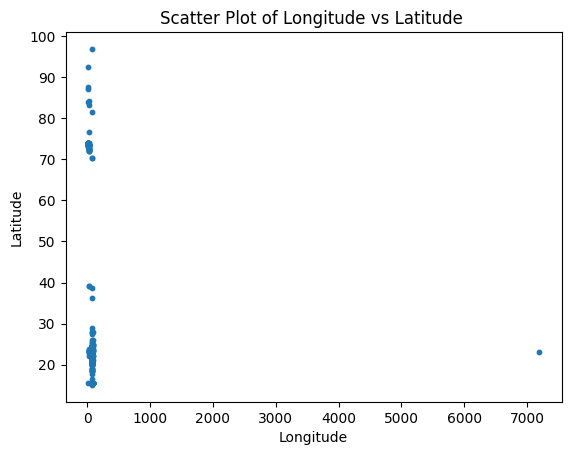

In [8]:
# So what is happening below is that the entire line of code is converting the 'Latitude' column in the DataFrame df_home_state to numeric values.
# Any values that cannot be converted (like non-numeric strings) will be replaced with NaN.Same for 'Longitude'.

df_home_state['Latitude'] = pd.to_numeric(df_home_state['Latitude'], errors='coerce')
df_home_state['Longitude'] = pd.to_numeric(df_home_state['Longitude'], errors='coerce')

plt.scatter(df_home_state['Longitude'],df_home_state['Latitude'], s = 10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs Latitude ')
plt.show()


# **2-C. Removing Outliers Using percentile**

***As there are a lot of pincodes the plot should approximately replicate the map of the home-state but currently it does not which means there are outliers disturbing the scale of the plot. We need to remove these outliers.***

In [9]:
df_home_state.describe()


,Pincode,Latitude,Longitude
count,8864.000000,8864.000000,8864.000000
mean,380431.569269,22.241565,72.722750
std,12422.587352,4.889141,75.790304
min,360001.000000,15.082000,15.593400
25%,365410.000000,21.310618,71.339015
50%,384241.000000,22.310000,72.637569
75%,391145.000000,23.128424,73.160000
max,396590.000000,96.872839,7192.000000


***We will Try using percentile to remove the outliers***

***(Not using mean and standard deviation as std deviation is too high for longitude)***

In [10]:
Q1_Latitude = df_home_state['Latitude'].quantile(0.25)
Q3_Latitude = df_home_state['Latitude'].quantile(0.75)

IQR_Latitude = Q3_Latitude - Q1_Latitude

Q1_Longitude = df_home_state['Longitude'].quantile(0.25)
Q3_Longitude = df_home_state['Longitude'].quantile(0.75)

IQR_Longitude = Q3_Longitude - Q1_Longitude

lower_limit_Latitude = Q1_Latitude - 1.5 * IQR_Latitude
upper_limit_Latitude = Q3_Latitude + 1.5 * IQR_Latitude

lower_limit_Longitude = Q1_Longitude - 1.5 * IQR_Longitude
upper_limit_Longitude = Q3_Longitude + 1.5 * IQR_Longitude

***Now we will update our dataframe and plot the Longitude vs Latitude***

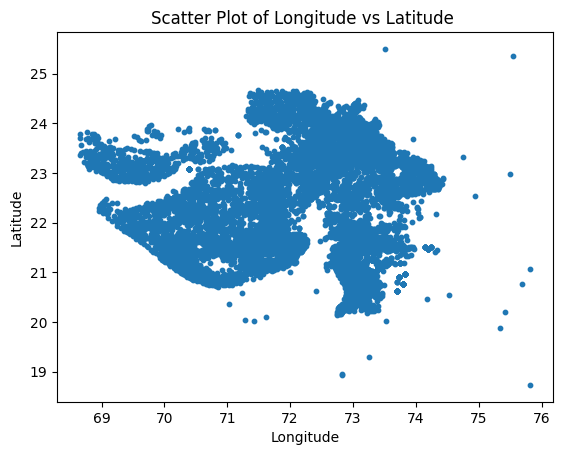

In [11]:
df_home_state = df_home_state[(df_home_state['Latitude'] >= lower_limit_Latitude) & (df_home_state['Latitude'] <= upper_limit_Latitude) & (df_home_state['Longitude'] >= lower_limit_Longitude) & (df_home_state['Longitude'] <= upper_limit_Longitude)]

plt.scatter(df_home_state['Longitude'],df_home_state['Latitude'], s = 10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs Latitude ')
plt.show()

# **2-D. Removing further outliers by eyeballing**

***Removing further outliers by eyeballing (because even if we try to use the above method it would not make much of a difference) and updating the dataframe and plotting***

In [12]:
df_home_state = df_home_state[( df_home_state['Latitude'] < 24.8) & (df_home_state['Latitude'] >= 19.6) & (df_home_state['Longitude'] < 74.5)]

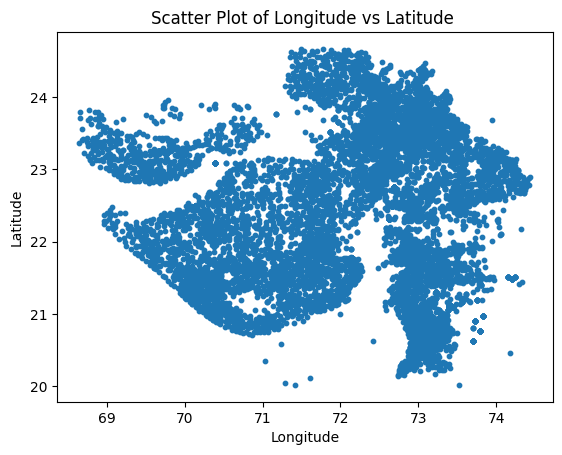

In [13]:
plt.scatter(df_home_state['Longitude'],df_home_state['Latitude'], s = 10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs Latitude ')
plt.show()

***Dropping rows where pincodes are repeated***

In [14]:
#df_home_state = df_home_state.drop_duplicates(subset='Pincode', keep='first', inplace=False)

***Plotting points on a Longitude vs Latitude ScatterPlot***

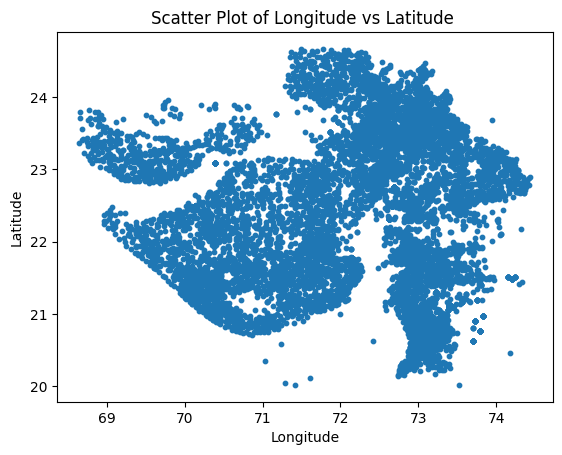

In [15]:
plt.scatter(df_home_state['Longitude'],df_home_state['Latitude'], s = 10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs Latitude ')
plt.show()

# **2-E. Normalising the Data**

***As we can see that value of latitude is in the vicinity of 20 - 24 and value of longitude is in the vicinity of 69 - 75, normalising here helps to remove the impact of scale and put all features on the same scale. We will use the MinMaxScaler***

***(new_value = (old_value - min_value)/(max_value - min_value))***

***All values are bounded within 0 - 1.***

In [16]:
class MinMaxScaler:
    def __init__(self, feature_range=(0, 1)):
        self.feature_range = feature_range
        self.min_val = None
        self.max_val = None

    def fit(self, X):
        self.min_val = X.min()
        self.max_val = X.max()

    def transform(self, X):
        X_scaled = (X - self.min_val) / (self.max_val - self.min_val)
        X_scaled = X_scaled * (self.feature_range[1] - self.feature_range[0]) + self.feature_range[0]
        return X_scaled

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


***Scaling Latitude and Longitude using MinMaxScaler***

In [17]:
scaler = MinMaxScaler()
scaler.fit(df_home_state[['Latitude']])
df_home_state['Latitude'] = scaler.transform(df_home_state[['Latitude']])

scaler.fit(df_home_state[['Longitude']])
df_home_state['Longitude'] = scaler.transform(df_home_state[['Longitude']])


# **3. Implementing KMeans**

In [18]:
coordinates = df_home_state[['Latitude', 'Longitude']].values

home_state = 'Gujarat'

def initialize_centroids(data, k):
    # Randomly pick k data points as initial centroids
    centroids_idx = np.random.choice(len(data), k, replace=False)
    centroids = data[centroids_idx]
    return centroids

def assign_clusters(data, centroids):
    # Assign each data point to the nearest centroid
    clusters = np.zeros(len(data))
    for i in range(len(data)):
        distances = np.linalg.norm(data[i] - centroids, axis=1)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters

def update_centroids(data, clusters, k):
    # Update centroids based on the mean of assigned points
    centroids = np.zeros((k, data.shape[1]))
    for cluster in range(k):
        cluster_points = data[clusters == cluster]
        centroids[cluster] = np.mean(cluster_points, axis=0)
    return centroids

def kmeans(data, k, max_iterations=100):
    # Initialize centroids
    centroids = initialize_centroids(data, k)

    for _ in range(max_iterations):
        # Assign points to closest centroids
        clusters = assign_clusters(data, centroids)

        # Update centroids
        new_centroids = update_centroids(data, clusters, k)

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids

def Sum_Of_Squared_Errors (data, centroids):
    sse = 0
    for i in range(len(centroids)):
        for j in range(len(data)):
          if data[j][2] == i:
              distance = np.sqrt(np.sum((data[j][0] - centroids[i][0])**2 + (data[j][1] - centroids[i][1])**2))
              sse += distance ** 2
    return sse



# **4. Finding the optimal number of clusters using elbow Method**

***I am adding slider widgets for better visualisation (But have some patience as it will take about a min for the new plot to appear after you change value once. If you change it multiple times in a small time frame multiple plots will be generated)***

IntSlider(value=20, description='Value of K(Max) for Elbow plot:', min=1)

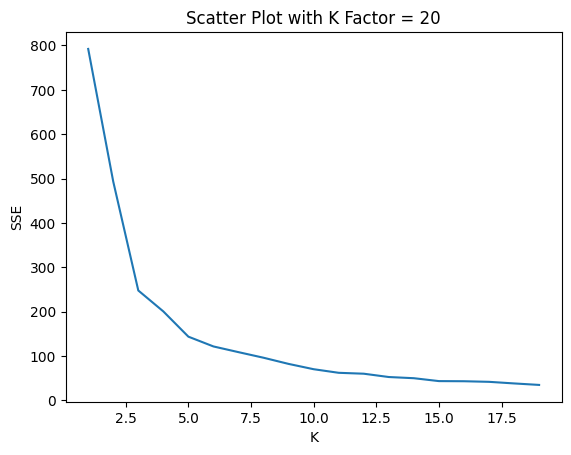

In [19]:
def update_plot(change):
    k = 20
    k = change['new']
    i_rng = range(1,k)
    sse = []
    for i in i_rng :
        clusters, centroids = (kmeans(coordinates, k = i))
        df_home_state['Clusters'] = clusters
        sse.append(Sum_Of_Squared_Errors(df_home_state[['Latitude','Longitude','Clusters']].values, centroids))

    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.title(f'Scatter Plot with K Factor = {k}')
    plt.plot(i_rng, sse)

slider = widgets.IntSlider(value=20, min=1, max=100, step=1, description='Value of K(Max) for Elbow plot:')
display(slider)
update_plot({'new': slider.value})
slider.observe(update_plot, names='value')

***We can see that elbow point is 5***

# **5. Visualization of Clusters**

***Plotting all the points and then plotting all the clusters for optimal number of clusters***

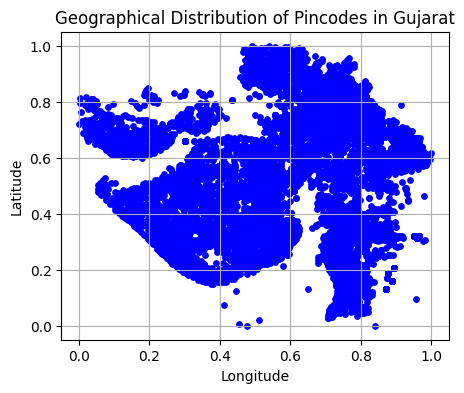

IntSlider(value=33, description='Clusters for KMeans:', max=50, min=1)

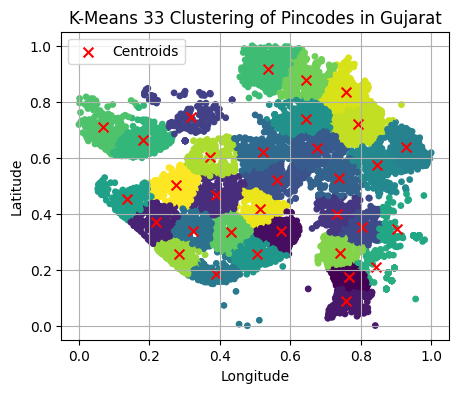

In [20]:
# Plotting all the points of the homestate
plt.figure(figsize=(5, 4))
plt.scatter(coordinates[:, 1], coordinates[:, 0], marker='o', color='blue', s=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Pincodes in Gujarat')
plt.grid(True)
plt.show()


# Making a slider for better viisualisation and changeable number of clusters
slider1 = widgets.IntSlider(value=5, min=1, max=50, step=1, description='Clusters for KMeans:')
display(slider1)

# Generating a new plot after every change in slider value
def update_plot1(change):
    k = change['new']
    clusters, centroids = kmeans(coordinates, k)

    # Assign cluster labels to the df_home_state
    df_home_state['Cluster'] = clusters

    # Plot the clusters
    plt.figure(figsize=(5, 4))
    plt.scatter(coordinates[:, 1], coordinates[:, 0], c=clusters, cmap='viridis', s=15)
    plt.scatter(centroids[:, 1], centroids[:, 0], marker='x', color='red', s=50, label='Centroids')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'K-Means {k} Clustering of Pincodes in {home_state}')
    plt.legend()
    plt.grid(True)
    plt.show()

update_plot1({'new': slider1.value})
slider1.observe(update_plot1, names='value')


# **Inference and Insights**

# **Inferences :**

**1. Geographical Distribution :**   

Visualizing the clusters on a map allows us to understand the spatial distribution of pincodes within Gujarat. Each cluster represents a group of pincodes that are in more or less inn the similar district if number of clusters are increased.

**2. Density of Pincodes :**

 If certain clusters have a higher density of pincodes compared to others. Higher density clusters might indicate urbanized areas or regions with higher population density.

**3. Size and Shape of Clusters :**

 Consider the spatial extent of each cluster. Do they cover large geographical areas or are they more compact? This can provide insights into the distribution patterns of population or economic activities.

# **Implications :**

**1. Infrastructure Planning :**

Clusters that correspond to major urban centers or densely populated areas are crucial for planning infrastructure projects such as roads, public transport, and utilities.

**2. Population Density :**

Clusters with high density of pincodes can indicate areas with higher population concentrations. This insight is valuable for demographic studies and resource allocation.

**3. Policy and Governance :**

Using clustering insights we can form policy decisions related to regional development, environmental conservation, or disaster management based on geographic vulnerabilities.

# **Libraries Documentation Links**

**Libraries :**

1. gdown GitHub Repository: https://github.com/wkentaro/gdown
2. Pandas Documentation: https://pandas.pydata.org/docs/
3. Python io Module Documentation: https://docs.python.org/3/library/io.html
4. NumPy Documentation: https://numpy.org/doc/stable/
5. Matplotlib Pyplot Documentation: https://matplotlib.org/stable/api/pyplot_api.html
6. Python warnings Module Documentation: https://docs.python.org/3/library/warnings.html
7. IPython Display Module Documentation: https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html
8. ipywidgets Documentation: https://ipywidgets.readthedocs.io/en/latest/